In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('D:/AutoInsuranceClaimFraudDetection/insurance fraud claims.csv')

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [5]:
df.shape

(1000, 40)

In [6]:
df = df.drop('_c39',axis=1)

In [7]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [8]:
obj_cols = df.select_dtypes(include='object').shape[1]
print("The Object Count is:",obj_cols)
num_cols = df.select_dtypes(include=['float','int']).shape[1]
print("The Numeric count is :",num_cols)

The Object Count is: 21
The Numeric count is : 18


In [9]:
obj_cols = df.select_dtypes(include='object')
print("The Object Cols is:",obj_cols.columns)
num_cols = df.select_dtypes(include=['float','int'])
print("The Numeric Cols is :",num_cols.columns)

The Object Cols is: Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')
The Numeric Cols is : Index(['months_as_customer', 'age', 'policy_number', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip',
       'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'auto_year'],
      dtype='object')


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


In [11]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [12]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i,':',df[i].nunique())

policy_bind_date : 951
policy_state : 3
policy_csl : 3
insured_sex : 2
insured_education_level : 7
insured_occupation : 14
insured_hobbies : 20
insured_relationship : 6
incident_date : 60
incident_type : 4
collision_type : 4
incident_severity : 4
authorities_contacted : 5
incident_state : 7
incident_city : 7
incident_location : 1000
property_damage : 3
police_report_available : 3
auto_make : 14
auto_model : 39
fraud_reported : 2


In [13]:
count = (df == '?').sum().sum()# single sum() will return column wise "?" count
print(count)

881


In [14]:
cols_with_question_mark = df.columns[df.eq("?").any()]
cols_with_question_mark

Index(['collision_type', 'property_damage', 'police_report_available'], dtype='object')

In [15]:
df.replace('?',np.nan,inplace=True)

In [16]:
count = (df == '?').sum().sum()# single sum() will return column wise "?" count
print(count)

0


In [17]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [18]:
df['collision_type'] = df['collision_type'].fillna(df['collision_type']).mode()[0]
df['property_damage'] = df['property_damage'].fillna(df['property_damage']).mode()[0]
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available']).mode()[0]

In [19]:
# df.isnull().sum()

In [20]:
countplot_cols = ['insured_sex','incident_type','collision_type','incident_severity','witnesses','property_damage','authorities_contacted']

In [21]:
list(countplot_cols)

['insured_sex',
 'incident_type',
 'collision_type',
 'incident_severity',
 'witnesses',
 'property_damage',
 'authorities_contacted']

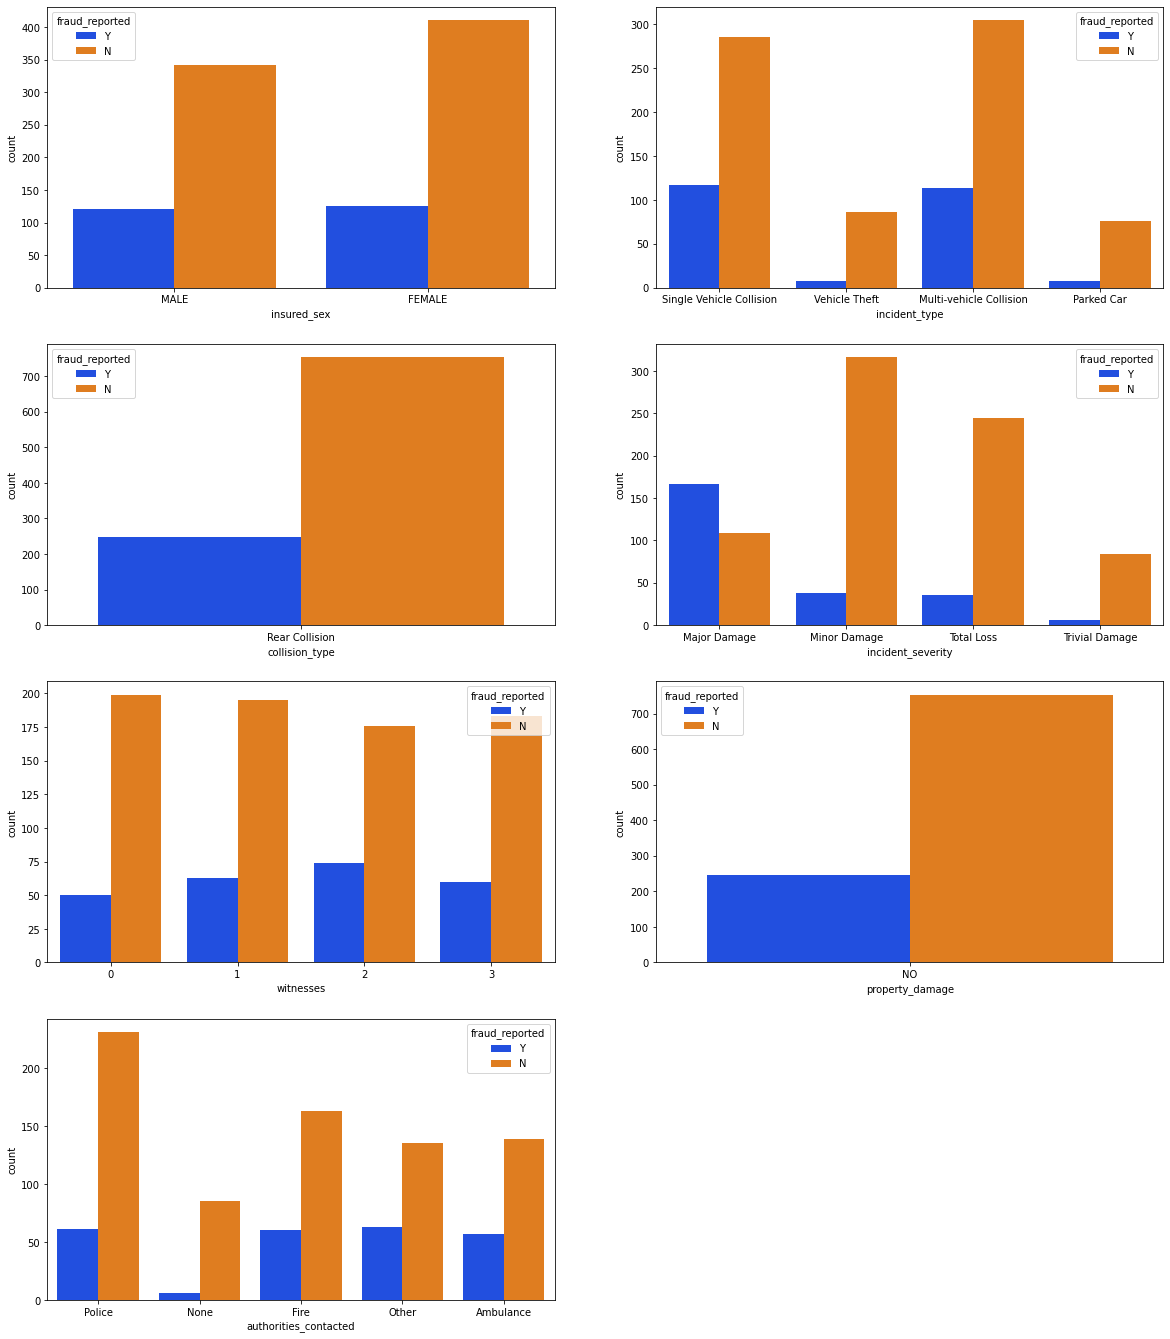

In [22]:
plt.figure(figsize=[20,30])
for i in enumerate(countplot_cols):
    plt.subplot(5,2,i[0]+1)
    sns.countplot(data=df, x =i[1],hue='fraud_reported',palette='bright')
#A string that names a built-in palette, such as "deep", "muted", "pastel", "bright", "dark", "colorblind".

In [23]:
histplot_columns = ['policy_deductable','policy_annual_premium', 'umbrella_limit','capital-gains','capital-loss','months_as_customer','age','total_claim_amount']

In [24]:
list(enumerate(histplot_columns))

[(0, 'policy_deductable'),
 (1, 'policy_annual_premium'),
 (2, 'umbrella_limit'),
 (3, 'capital-gains'),
 (4, 'capital-loss'),
 (5, 'months_as_customer'),
 (6, 'age'),
 (7, 'total_claim_amount')]

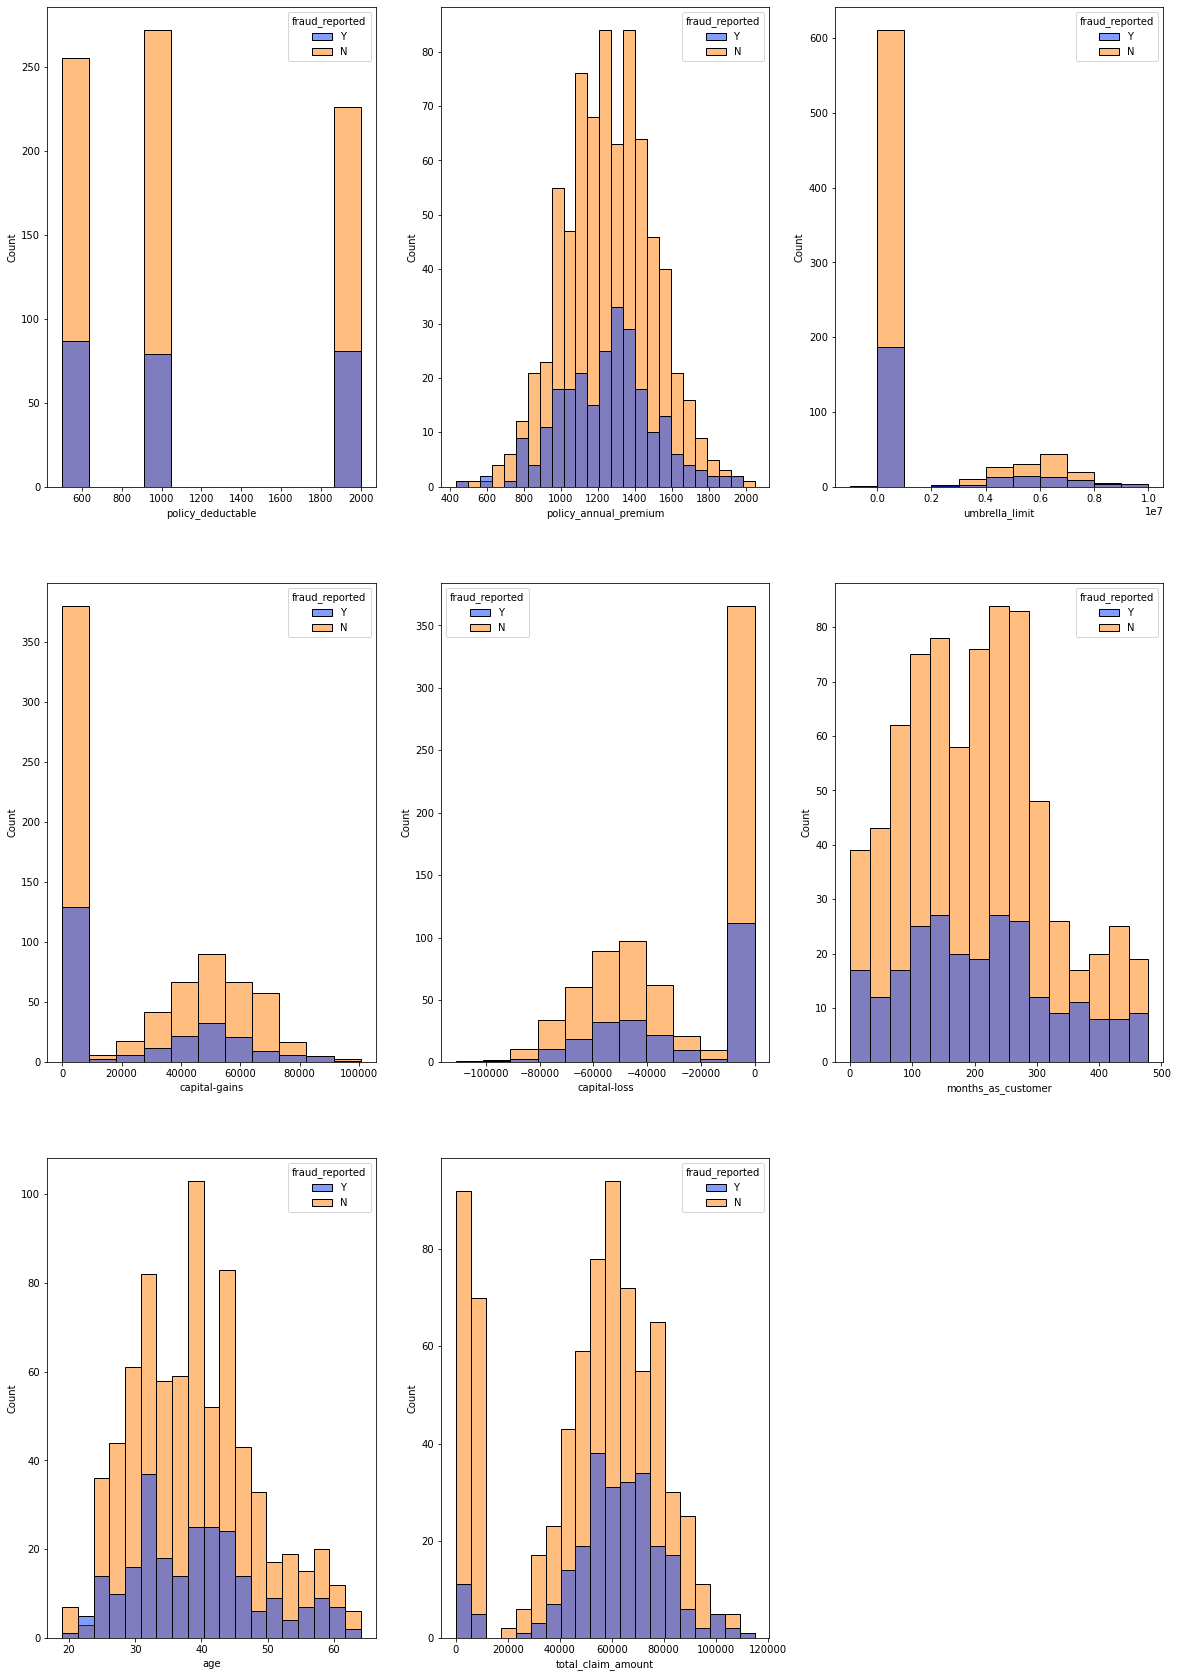

In [25]:
plt.figure(figsize=[20,30])
for z in enumerate(histplot_columns):
    plt.subplot(3,3,z[0]+1)
    sns.histplot(df,x =z[1],hue='fraud_reported',palette='bright')

In [26]:
df['fraud_reported'] = np.where(df['fraud_reported'] == 'Y',1,df['fraud_reported'])
df['fraud_reported'] = np.where(df['fraud_reported'] == 'N',0,df['fraud_reported'])

In [27]:
df['fraud_reported'] = df['fraud_reported'].astype('int64')

<AxesSubplot:>

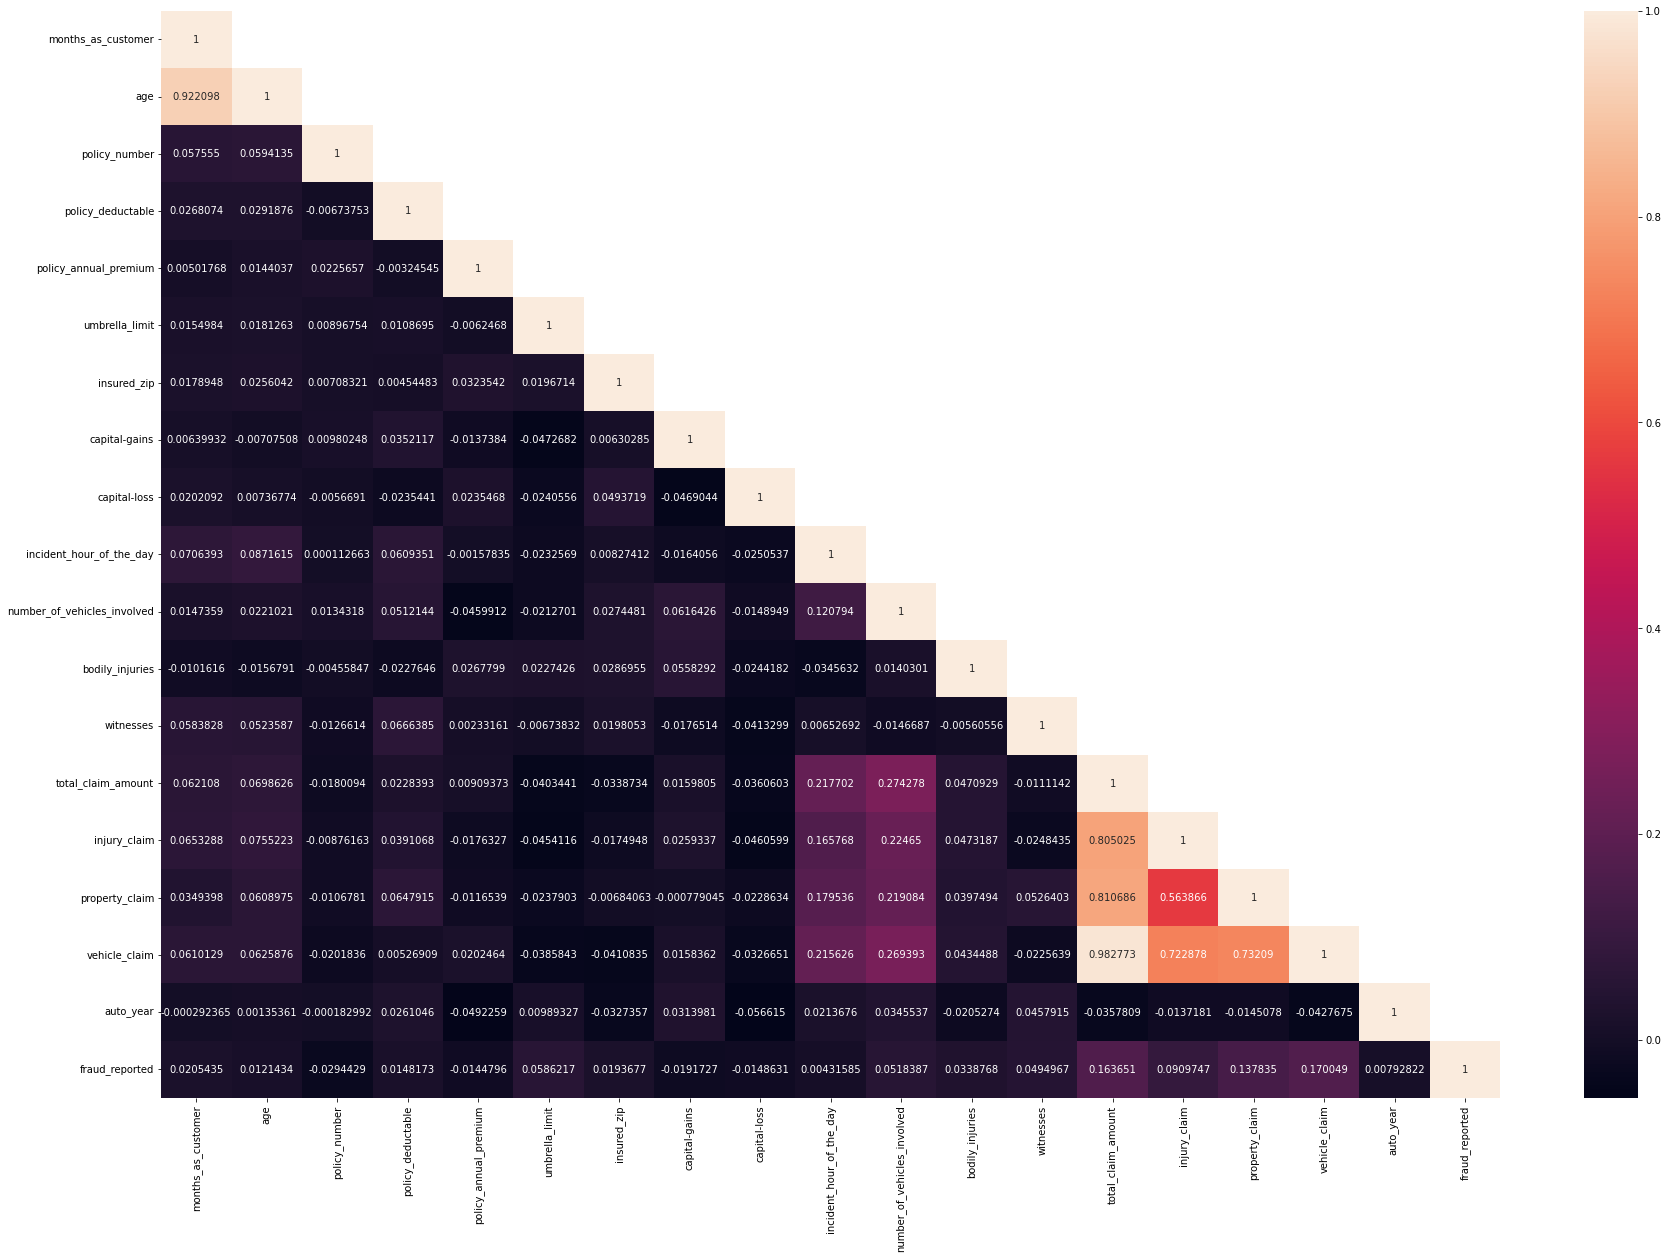

In [28]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),annot=True,fmt='g',mask=np.triu(df.corr(),+1))

<AxesSubplot:>

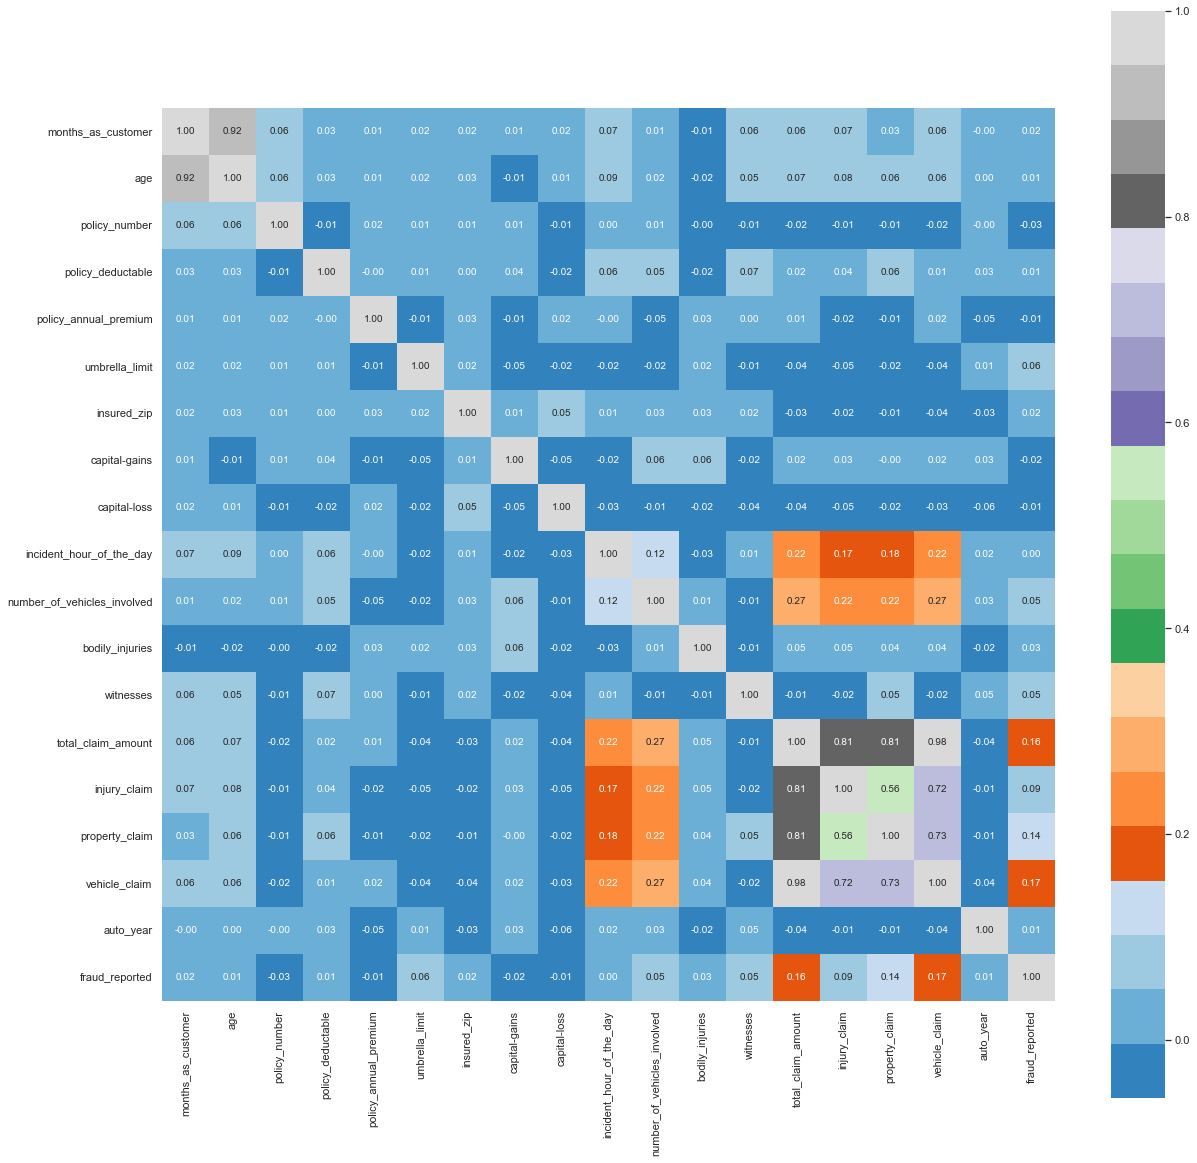

In [29]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df.corr(),annot=True,cbar=True,square=True,cmap='tab20c',annot_kws={'size': 10},fmt='.2f')

<AxesSubplot:>

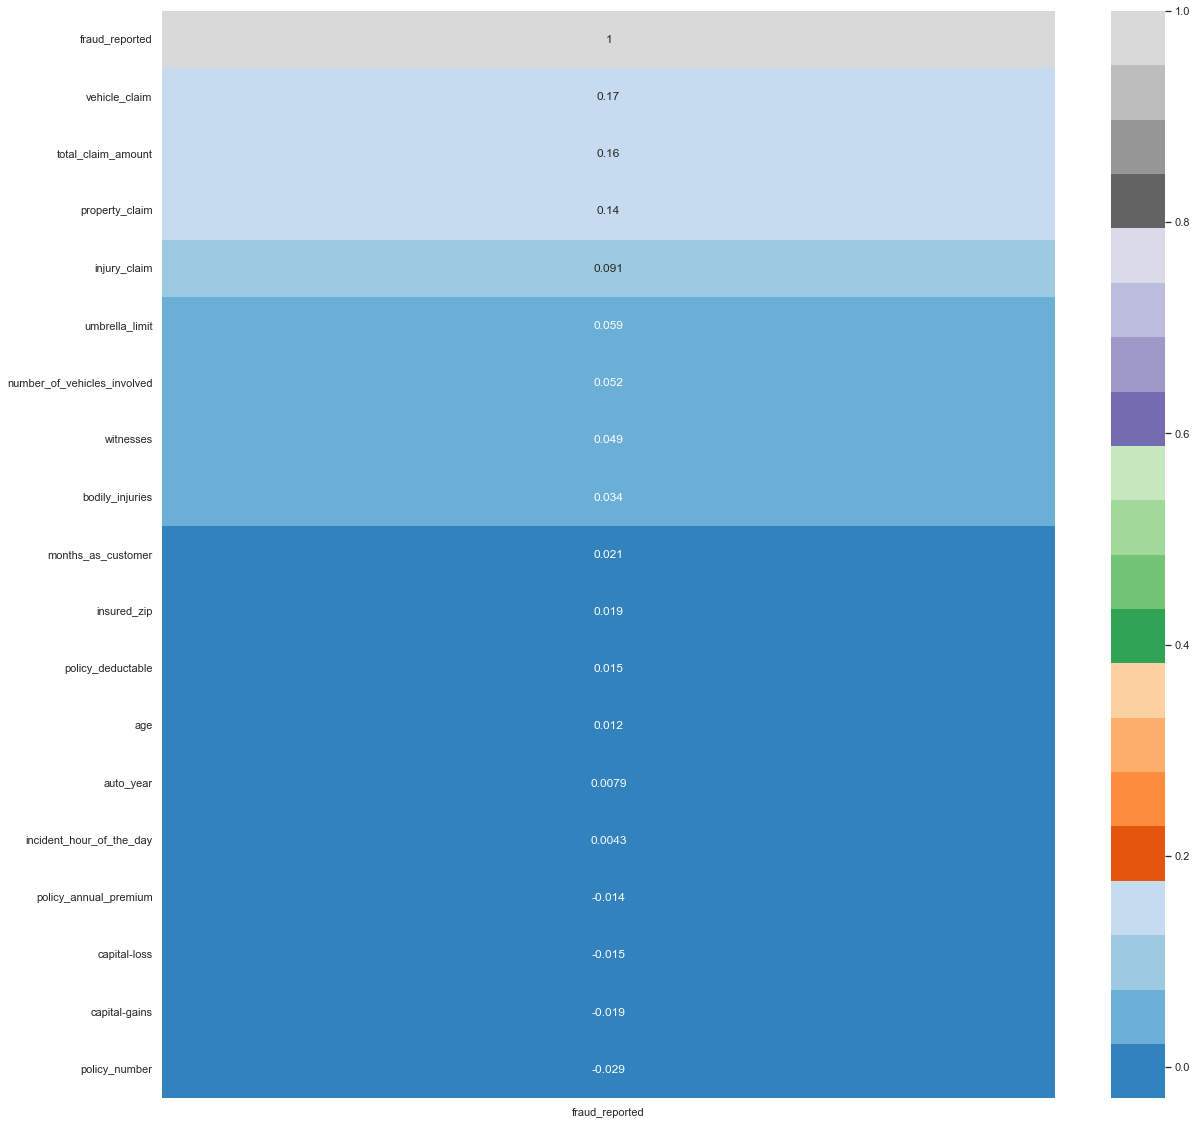

In [30]:
sns.heatmap(df.corr()[['fraud_reported']].nlargest(40,'fraud_reported'),annot=True,cmap='tab20c')

In [31]:
col_drop = ['policy_number','policy_bind_date','policy_state','policy_csl','policy_annual_premium','insured_zip','insured_hobbies','insured_relationship','capital-gains','capital-loss','incident_date','incident_state','incident_city','incident_location','injury_claim','property_claim','vehicle_claim','auto_make','auto_model','auto_year']

In [32]:
df.drop(col_drop,axis=1,inplace=True)

In [33]:
num_df = df.select_dtypes(include = ['int64'])#.drop('fraud_reported', axis=1)

In [34]:
num_df.columns

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'fraud_reported'],
      dtype='object')

In [35]:
num_df_col_names = num_df.columns

In [36]:
num_df_col_names

Index(['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'bodily_injuries', 'witnesses', 'total_claim_amount', 'fraud_reported'],
      dtype='object')

In [37]:
cat_df = df.select_dtypes(include=['object'])

In [38]:
cat_df.columns

Index(['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available'],
      dtype='object')

# Apply OneHotEncoding to Categorical Variables

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
One_encoder = OneHotEncoder(handle_unknown = 'ignore',drop='first')
cat_enc_data = pd.DataFrame(One_encoder.fit_transform(df[['insured_sex', 'insured_education_level', 'insured_occupation',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'property_damage', 'police_report_available']]).toarray())


In [41]:
One_encoder.get_feature_names_out()

array(['insured_sex_MALE', 'insured_education_level_College',
       'insured_education_level_High School',
       'insured_education_level_JD', 'insured_education_level_MD',
       'insured_education_level_Masters', 'insured_education_level_PhD',
       'insured_occupation_armed-forces',
       'insured_occupation_craft-repair',
       'insured_occupation_exec-managerial',
       'insured_occupation_farming-fishing',
       'insured_occupation_handlers-cleaners',
       'insured_occupation_machine-op-inspct',
       'insured_occupation_other-service',
       'insured_occupation_priv-house-serv',
       'insured_occupation_prof-specialty',
       'insured_occupation_protective-serv', 'insured_occupation_sales',
       'insured_occupation_tech-support',
       'insured_occupation_transport-moving', 'incident_type_Parked Car',
       'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'incident_severity_Minor Damage',
       'incident_severity_Total Loss', 'in

In [42]:
cat_enc_data.columns = One_encoder.get_feature_names_out()

# Apply LabelEncoding to Categorical Variables

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
# encoder = LabelEncoder()

In [45]:
# df[['insured_sex','insured_education_level', 'insured_occupation',
#        'incident_type', 'collision_type', 'incident_severity',
#         'authorities_contacted', 'property_damage', 'police_report_available']] = df[['insured_sex','insured_education_level', 'insured_occupation',
#        'incident_type', 'collision_type', 'incident_severity',
#         'authorities_contacted', 'property_damage', 'police_report_available']].apply(encoder.fit_transform)

In [46]:
# cat_enc_data = df[['insured_sex','insured_education_level', 'insured_occupation',
#        'incident_type', 'collision_type', 'incident_severity',
#         'authorities_contacted', 'property_damage', 'police_report_available']]

In [47]:
cat_enc_data

,insured_sex_MALE,insured_education_level_College,insured_education_level_High School,insured_education_level_JD,insured_education_level_MD,insured_education_level_Masters,insured_education_level_PhD,insured_occupation_armed-forces,insured_occupation_craft-repair,insured_occupation_exec-managerial,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [48]:
df_new = pd.concat([num_df, cat_enc_data],axis=1)

In [49]:
df_new

,months_as_customer,age,policy_deductable,umbrella_limit,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,fraud_reported,...,incident_type_Parked Car,incident_type_Single Vehicle Collision,incident_type_Vehicle Theft,incident_severity_Minor Damage,incident_severity_Total Loss,incident_severity_Trivial Damage,authorities_contacted_Fire,authorities_contacted_None,authorities_contacted_Other,authorities_contacted_Police
0,328,48,1000,0,5,1,1,2,71610,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,228,42,2000,5000000,8,1,0,0,5070,1,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,134,29,2000,5000000,7,3,2,3,34650,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,256,41,2000,6000000,5,1,1,2,63400,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,228,44,1000,6000000,20,1,0,1,6500,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1000,0,20,1,0,1,87200,0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,285,41,1000,0,23,1,2,3,108480,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
997,130,34,500,3000000,4,3,2,3,67500,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
998,458,62,2000,5000000,2,1,0,1,46980,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
# from scipy.stats import zscore
# df_scaled = df_new.apply(zscore)

In [51]:
X = df_new.drop('fraud_reported',axis=1)
y = df_new.pop('fraud_reported')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [54]:
from sklearn.decomposition import PCA

In [55]:
#Selecting n_components by using explained variance 
pca = PCA()
pca.fit(X)
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_explained_variance >= 0.8) + 1

In [56]:
n_components

1

In [57]:
# pca = PCA(n_components =30)
# pca.fit(X)
# X_pca = pca.transform(X)

In [58]:
# print(pca.explained_variance_ratio_)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [60]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [61]:
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [62]:
print(accuracy_score(y_train_pred,y_train))

1.0


In [63]:
print(accuracy_score(y_test_pred,y_test))

0.7233333333333334


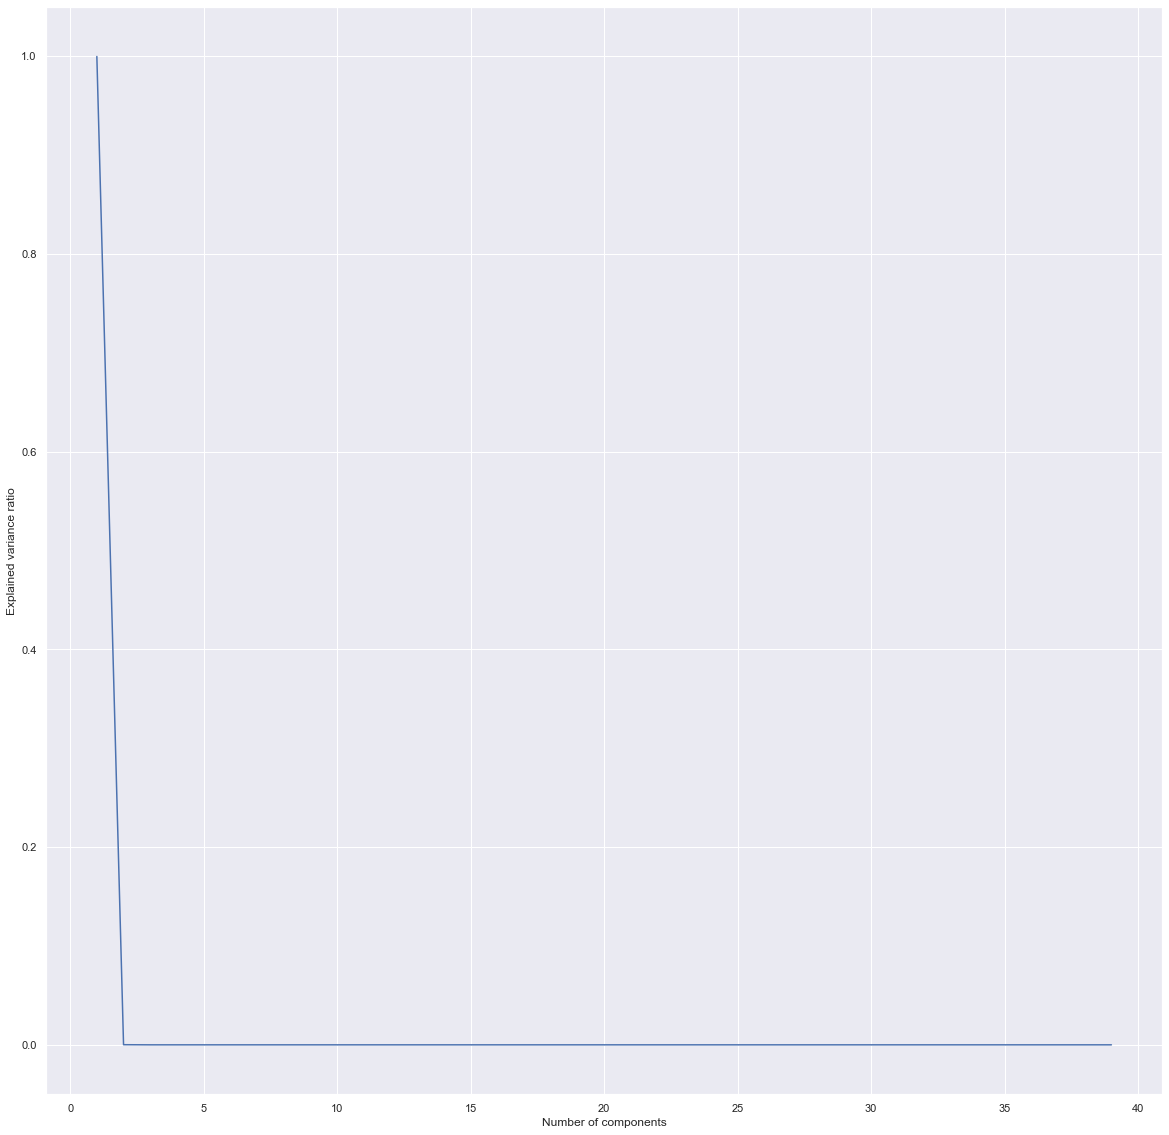

In [64]:
pca = PCA()
pca.fit(X)
plt.plot(range(1, X.shape[1]+1), pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()

In [65]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [66]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.datasets import make_classification
from collections import Counter
from numpy import where
import matplotlib.pyplot as plt

In [67]:
X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.1, 0.9], n_informative=3,
                           n_redundant=1, flip_y=0, n_features=20,
                           n_clusters_per_class=1, n_samples=1000,
                           random_state=10)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [69]:
ros = RandomOverSampler(random_state=0)

In [70]:
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [72]:
y_train_pd = pd.Series(y_train)

In [73]:
print("Original class distribution:")
print(y_train_pd.value_counts())
print("\nOversampled class distribution:")
print(pd.Series(y_resampled).value_counts())

Original class distribution:
1    627
0     73
dtype: int64

Oversampled class distribution:
0    627
1    627
dtype: int64


In [75]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_train_pred = rfc.predict(X_train)
y_test_pred = rfc.predict(X_test)

In [76]:
print(accuracy_score(y_train_pred,y_train))

1.0


In [77]:
print(accuracy_score(y_test_pred,y_test))

0.9933333333333333
